In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [13]:
def rolling_window(array, window=1000):
    """
    apply a rolling window to a np.ndarray

    :param array: (np.ndarray) the input Array
    :param window: (int) length of the rolling window
    :return: (np.ndarray) rolling window on the input array
    """
    shape = array.shape[:-1] + (array.shape[-1] - window + 1, window)
    strides = array.strides + (array.strides[-1],)
    return np.lib.stride_tricks.as_strided(array, shape=shape, strides=strides)

In [14]:
def plot_one_line(y_mean, y_std=None, color=None, label=None):
    y_mean = y_mean[np.isfinite(y_mean)]
    y_mean_ = np.array([np.mean(y_mean[i:i+100]) for i in range(len(y_mean)-100)])
#     print(len(y_mean_))
    y_std_ = np.array([np.std(y_mean[i:i+100]) for i in range(len(y_mean)-100)])
#     print(len(y_std_))
    x = np.arange(len(y_mean_)) * 100
#     print(len(x))
    if y_std_ is not None:
        min_ = y_mean_ - y_std_
        max_ = y_mean_ + y_std_
        plt.fill_between(x, min_, max_, alpha=0.2, color=color)
    plt.plot(x, y_mean_, label=label, color=color)

In [15]:
from stable_baselines.results_plotter import COLORS

def plot(*paths, **kargs):
    for (path, label, color) in paths:
        csv = pd.read_csv(os.path.join(path, 'progress.csv'))
#         pdf_path = os.path.join(path, 'ep_reward.pdf')
#         png_path = os.path.join(path, 'ep_reward.png')
        plot_one_line(csv[kargs['column']], color=color, label=label)
        print('plotting', os.path.join(path, 'progress.csv'))
    
    plt.title(kargs['title'])
    plt.xlabel(kargs['xlabel'])
    plt.legend()
#     plt.grid()
#     pdf.savefig()
    plt.savefig(os.path.join(path, 'reward.png'))
    plt.show()
#     plt.cla()

plotting logs/BreakoutNoFrameskip-v4/baseline/progress.csv
plotting logs/BreakoutNoFrameskip-v4/3/progress.csv
plotting logs/BreakoutNoFrameskip-v4/0/progress.csv
plotting logs/BreakoutNoFrameskip-v4/1/progress.csv
plotting logs/BreakoutNoFrameskip-v4/2/progress.csv
plotting logs/BreakoutNoFrameskip-v4/4/progress.csv


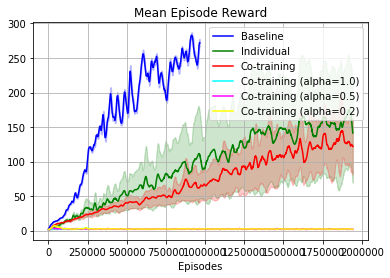

In [19]:
plot(
    ('logs/BreakoutNoFrameskip-v4/baseline/', 'Baseline', COLORS[0]),
    ('logs/BreakoutNoFrameskip-v4/3/', 'Individual', COLORS[1]), 
    ('logs/BreakoutNoFrameskip-v4/0/', 'Co-training', COLORS[2]),
    ('logs/BreakoutNoFrameskip-v4/1/', 'Co-training (alpha=1.0)', COLORS[3]),
    ('logs/BreakoutNoFrameskip-v4/2/', 'Co-training (alpha=0.5)', COLORS[4]),
    ('logs/BreakoutNoFrameskip-v4/4/', 'Co-training (alpha=0.2)', COLORS[5]),
    column='ep_reward_mean', xlabel='episodes', title='Mean Episode Reward'
)

plotting logs/BreakoutNoFrameskip-v4/baseline/progress.csv
plotting logs/BreakoutNoFrameskip-v4/3/progress.csv
plotting logs/BreakoutNoFrameskip-v4/0/progress.csv
plotting logs/BreakoutNoFrameskip-v4/1/progress.csv
plotting logs/BreakoutNoFrameskip-v4/2/progress.csv
plotting logs/BreakoutNoFrameskip-v4/4/progress.csv


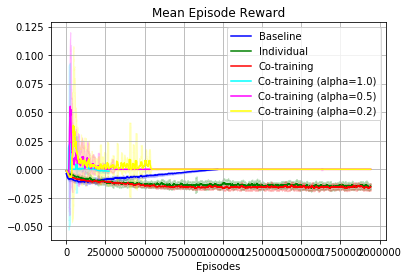

In [21]:
plot(
    ('logs/BreakoutNoFrameskip-v4/baseline/', 'Baseline', COLORS[0]),
    ('logs/BreakoutNoFrameskip-v4/3/', 'Individual', COLORS[1]), 
    ('logs/BreakoutNoFrameskip-v4/0/', 'Co-training', COLORS[2]),
    ('logs/BreakoutNoFrameskip-v4/1/', 'Co-training (alpha=1.0)', COLORS[3]),
    ('logs/BreakoutNoFrameskip-v4/2/', 'Co-training (alpha=0.5)', COLORS[4]),
    ('logs/BreakoutNoFrameskip-v4/4/', 'Co-training (alpha=0.2)', COLORS[5]),
    column='policy_loss', xlabel='episodes', title='Co-training loss')